In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
from tensorflow.keras.models import load_model
import tensorflow as tf

In [36]:
df = pd.read_csv('Clean_Std_Data_Avito')

In [37]:
#Разделение данных на тестовую и тренировочную выборку
x = df.drop(columns='Цена')
y = df['Цена']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size = 0.125, random_state=42)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(518, 7)
(74, 7)
(148, 7)


In [38]:
with open('model_rf_ML.pkl', 'rb') as f:
    model_rf_Ml = pickle.load(f)


In [39]:
mlp_model3 = load_model('mlp_model3.h5', compile=True)

In [40]:
print(x_test.shape)

(148, 7)


In [41]:
pred_MLP = mlp_model3.predict(x_test)
pred_ML = model_rf_Ml.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


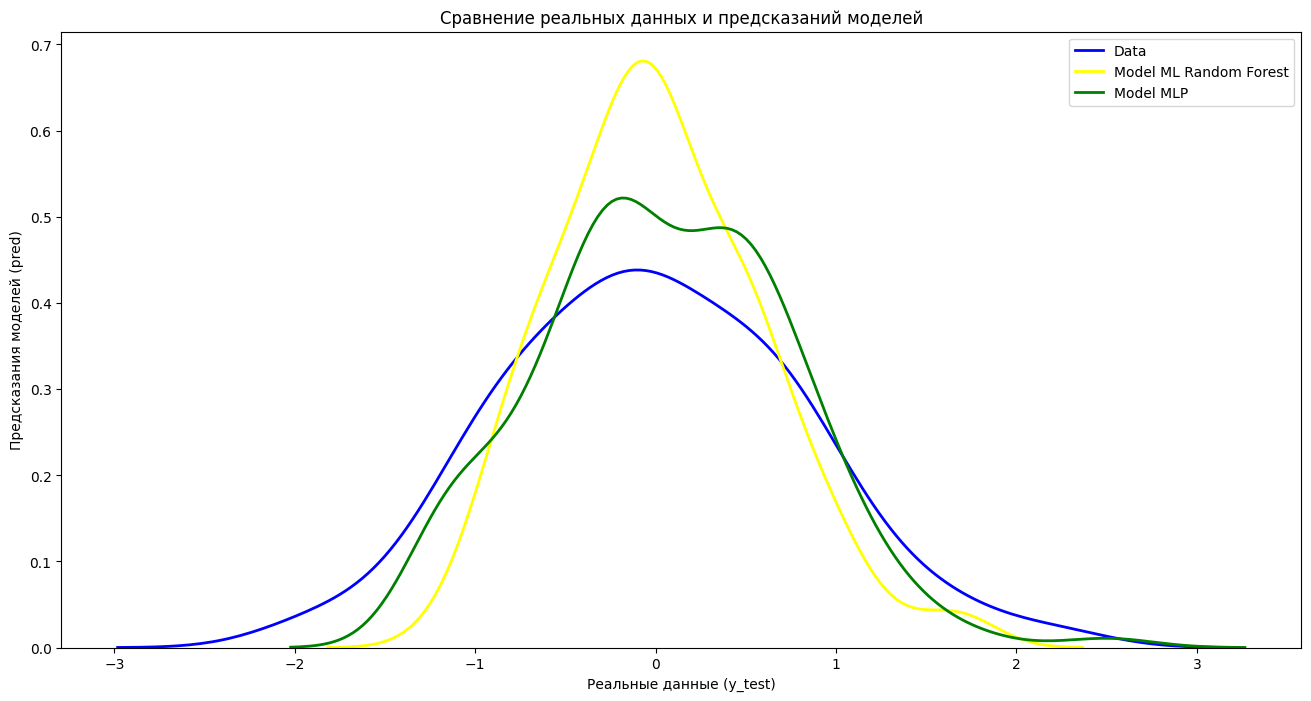

In [42]:
plt.figure(figsize=(16, 8))

sns.kdeplot(y_test, color='blue', label='Data', lw=2)
sns.kdeplot(pred_ML.flatten(), color='yellow', label='Model ML Random Forest', lw=2)
sns.kdeplot(pred_MLP.flatten(), color='green', label='Model MLP', lw=2)

plt.xlabel('Реальные данные (y_test)')
plt.ylabel('Предсказания моделей (pred)')
plt.title('Сравнение реальных данных и предсказаний моделей')
plt.legend()

plt.show()

In [45]:
print(f"MAE pred_ML: {mean_absolute_error(y_test, pred_ML):.2}")
print(f"MSE pred_ML: {mean_squared_error(y_test, pred_ML):.2}")
print(f"r2 pred_ML: {r2_score(y_test, pred_ML):.2}")

MAE pred_ML: 0.49
MSE pred_ML: 0.39
r2 pred_ML: 0.43


In [47]:
print(f"MAE pred_MLP: {mean_absolute_error(y_test, pred_MLP):.2}")
print(f"MSE pred_MLP: {mean_squared_error(y_test, pred_MLP):.2}")
print(f"r2 pred_MLP: {r2_score(y_test, pred_MLP):.2}")

MAE pred_MLP: 0.51
MSE pred_MLP: 0.43
r2 pred_MLP: 0.38
